## Relavant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Importing the Data and Pre-processing

In [2]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/a7madmostafa/365datascience/master/20%20-%20Time%20Series%20Analysis%20in%20Python/3_Introduction%20to%20Time%20Series%20in%20Python/1_Introduction%20to%20Time%20Series%20Data%20(3%3A56)/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.ffill()

In [3]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Removing Surplus Data

In [4]:
df_comp.rename(columns={'ftse': 'market_value'}, inplace=True)
del df_comp['dax']
del df_comp['spx']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df_train, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
df_train.describe()

,market_value
count,5021.000000
mean,5089.640864
std,1017.110427
min,2876.600000
25%,4274.040000
50%,5266.060000
75%,5917.710000
max,6930.200000


## LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df_train['returns'] = df_train.market_value.pct_change(1)*100

## ARMA(1,1)

In [8]:
model_ret_ar_1_ma_1 = ARIMA(df_train.returns[1:], order=(1,0,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Mon, 05 Aug 2024   AIC                          15841.000
Time:                        00:34:39   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.000      -0.893      -0.735
sigma2         1.3718      0.014     98.110      0.000       1.344       1.399
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):              7488.92
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
model_ret_ar_1 = ARIMA(df_train.returns[1:], order = (1,0,0))
model_ret_ma_1 = ARIMA(df_train.returns[1:], order = (0,0,1))

In [10]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1))


ARMA vs AR  0.0

ARMA vs MA  0.0


## Higher-Lag ARMA Models

In [11]:
model_ret_ar_6_ma_8 = ARIMA(df_train.returns[1:], order=(6,0,8))
results_ret_ar_6_ma_8 = model_ret_ar_6_ma_8.fit()
results_ret_ar_6_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 8)   Log Likelihood               -7881.973
Date:                Mon, 05 Aug 2024   AIC                          15795.946
Time:                        00:35:01   BIC                          15900.285
Sample:                    01-10-1994   HQIC                         15832.508
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.285      0.199      -0.010       0.048
ar.L1         -0.3079      0.137     -2.240      0.025      -0.577      -0.039
ar.L2         -0.5309      0.115     -4.623      0.000      -0.756      -0.306
ar.L3          0.4862      0.151      3.225      0.001       0.191       0.782
ar.L4          0.1559      0.091      1.709      0.088      -0.023       0.335
ar.L5          0.6947      0.080      8.637      0.000       0.537       0.852
ar.L6          0.2013      0.079      2.559      0.010       0.047       0.355
ma.L1          0.2841      0.137      2.066      0.039       0.015       0.554
ma.L2          0.4739      0.115      4.131      0.000       0.249       0.699
ma.L3         -0.5991      0.145     -4.119      0.000      -0.884      -0.314
ma.L4         -0.1473      0.092     -1.596      0.110      -0.328       0.034
ma.L5         -0.7420      0.077     -9.628      0.000      -0.893      -0.591
ma.L6         -0.1565      0.084     -1.867      0.062      -0.321       0.008
ma.L7          0.0107      0.015      0.719      0.472      -0.019       0.040
ma.L8          0.1012      0.016      6.420      0.000       0.070       0.132
sigma2         1.3530      0.015     91.169      0.000       1.324       1.382
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6513.74
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Many of the coefficients are not significant as we can judge from their P-value. That's why we should try for a lower model.

In [12]:
model_ret_ar_3_ma_3 = ARIMA(df_train.returns[1:], order=(3,0,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [13]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7893.515
Date:                Mon, 05 Aug 2024   AIC                          15803.030
Time:                        00:35:06   BIC                          15855.200
Sample:                    01-10-1994   HQIC                         15821.311
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.1880      0.068     -2.780      0.005      -0.321      -0.055
ar.L2         -0.2926      0.054     -5.380      0.000      -0.399      -0.186
ar.L3          0.4469      0.062      7.253      0.000       0.326       0.568
ma.L1          0.1690      0.063      2.686      0.007       0.046       0.292
ma.L2          0.2260      0.052      4.328      0.000       0.124       0.328
ma.L3         -0.5442      0.056     -9.632      0.000      -0.655      -0.433
sigma2         1.3591      0.015     92.543      0.000       1.330       1.388
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              6862.43
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

0.0

Same as above , the lag values are not significant but it is a better model than ARIMA(1,0,1) as we can observe from the LLR test. Hence the best model must be lying somewhere between ARIMA(1,0,1) and ARIMA(3,0,3)

In [15]:
model_ret_ar_3_ma_2 = ARIMA(df_train.returns[1:], order=(3,0,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7895.747
Date:                Mon, 05 Aug 2024   AIC                          15805.495
Time:                        00:35:16   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.211      0.226      -0.012       0.049
ar.L1         -0.6778      0.055    -12.298      0.000      -0.786      -0.570
ar.L2         -0.5082      0.063     -8.035      0.000      -0.632      -0.384
ar.L3         -0.1141      0.009    -12.755      0.000      -0.132      -0.097
ma.L1          0.6561      0.056     11.747      0.000       0.547       0.766
ma.L2          0.4468      0.064      7.031      0.000       0.322       0.571
sigma2         1.3604      0.015     91.796      0.000       1.331       1.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6513.61
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model_ret_ar_2_ma_3 = ARIMA(df_train.returns[1:], order=(2,0,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7895.587
Date:                Mon, 05 Aug 2024   AIC                          15805.175
Time:                        00:35:20   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.015      1.224      0.221      -0.011       0.049
ar.L1         -0.5600      0.057     -9.777      0.000      -0.672      -0.448
ar.L2         -0.4178      0.065     -6.381      0.000      -0.546      -0.289
ma.L1          0.5373      0.057      9.417      0.000       0.425       0.649
ma.L2          0.3531      0.066      5.383      0.000       0.225       0.482
ma.L3         -0.1159      0.009    -12.679      0.000      -0.134      -0.098
sigma2         1.3604      0.015     91.315      0.000       1.331       1.390
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6515.27
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

0.042

In [18]:
LLR_test(model_ret_ar_3_ma_2, model_ret_ar_3_ma_3)

0.035

From above we can conclude that both ARIMA(2,0,3) and ARIMA(3,0,2) are better models than ARIMA(3,0,3). And also from LLR Test we can conclude that ARIMA(3,0,2) is more Preferable over ARIMA(2,0,3).

**Note:-** Do not Bother About constant closing to zero as in Returns, it is observed to happen generally.

In [19]:
model_ret_ar_3_ma_1 = ARIMA(df_train.returns[1:], order=(3,0,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7899.072
Date:                Mon, 05 Aug 2024   AIC                          15810.144
Time:                        00:35:39   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.248      0.212      -0.011       0.048
ar.L1         -0.5074      0.062     -8.155      0.000      -0.629      -0.385
ar.L2         -0.0638      0.009     -7.027      0.000      -0.082      -0.046
ar.L3         -0.1102      0.008    -13.610      0.000      -0.126      -0.094
ma.L1          0.4836      0.064      7.608      0.000       0.359       0.608
sigma2         1.3623      0.015     92.782      0.000       1.334       1.391
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6490.60
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)

0.01

In [21]:
model_ret_ar_2_ma_2 = ARIMA(df_train.returns[1:], order=(2,0,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7914.692
Date:                Mon, 05 Aug 2024   AIC                          15841.384
Time:                        00:35:48   BIC                          15880.511
Sample:                    01-10-1994   HQIC                         15855.095
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1         -0.0969      0.091     -1.068      0.286      -0.275       0.081
ar.L2          0.6975      0.066     10.509      0.000       0.567       0.828
ma.L1          0.0399      0.092      0.435      0.663      -0.140       0.220
ma.L2         -0.7259      0.071    -10.274      0.000      -0.864      -0.587
sigma2         1.3708      0.014     95.248      0.000       1.343       1.399
===================================================================================
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):              7237.20
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
model_ret_ar_1_ma_3 = ARIMA(df_train.returns[1:], order=(1,0,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -7896.838
Date:                Mon, 05 Aug 2024   AIC                          15805.676
Time:                        00:35:49   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.265      0.206      -0.010       0.048
ar.L1         -0.4693      0.060     -7.878      0.000      -0.586      -0.353
ma.L1          0.4469      0.060      7.437      0.000       0.329       0.565
ma.L2         -0.0637      0.009     -7.277      0.000      -0.081      -0.047
ma.L3         -0.1182      0.008    -14.693      0.000      -0.134      -0.102
sigma2         1.3610      0.015     92.540      0.000       1.332       1.390
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6401.49
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
print("\n ARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL =  -7895.747490024599 	AIC =  15805.494980049198

 ARMA(1,3): 	LL =  -7896.837909205577 	AIC =  15805.675818411153


So from analysis upto now, the best model is ARIMA(3,0,2)

## Residuals for Returns

In [24]:
df_train['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

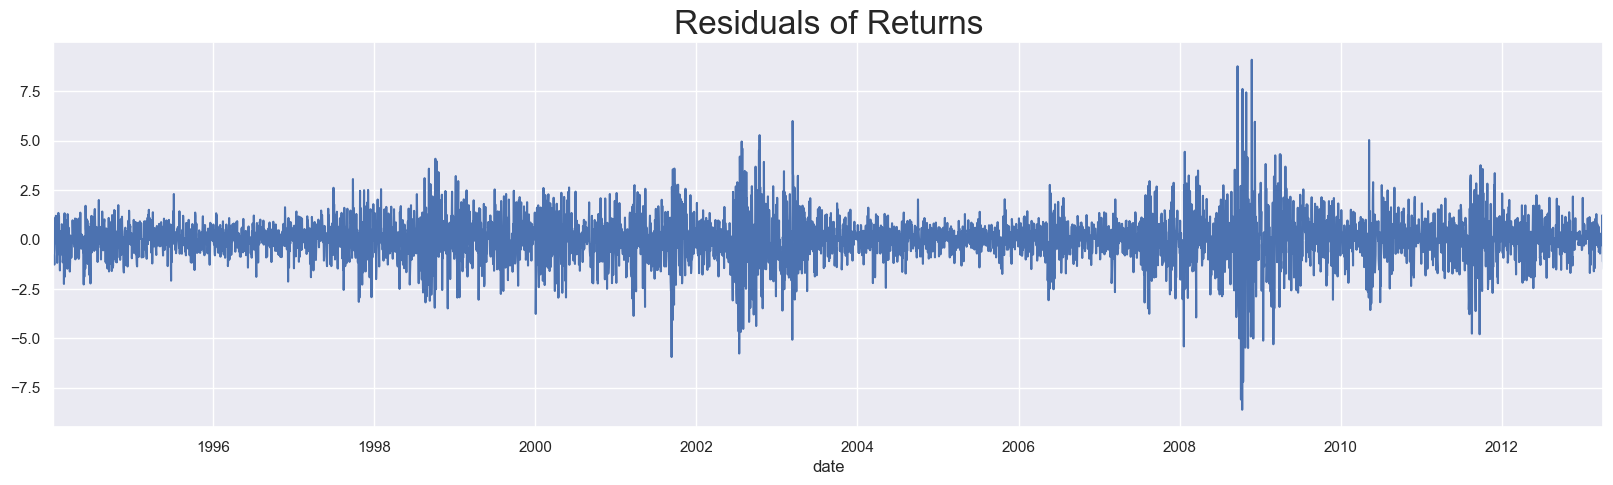

In [25]:
df_train.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

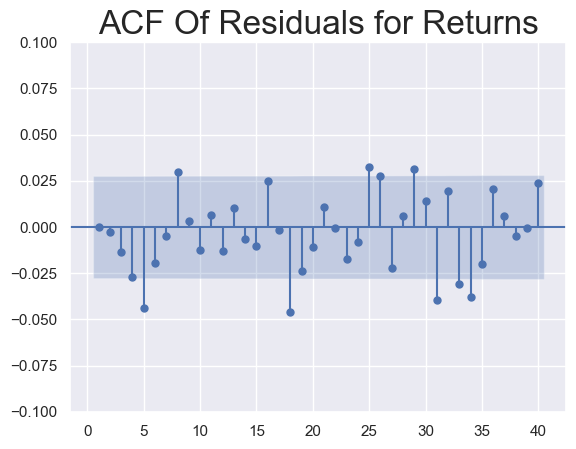

In [26]:
sgt.plot_acf(df_train.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.ylim(-0.1,0.1)
plt.show()

## Re-evaluating Model Selection

In [27]:
model_ret_ar_5_ma_5 = ARIMA(df_train.returns[1:], order=(5,0,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -7882.959
Date:                Mon, 05 Aug 2024   AIC                          15789.917
Time:                        00:36:01   BIC                          15868.171
Sample:                    01-10-1994   HQIC                         15817.339
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.0578      0.126     -0.461      0.645      -0.304       0.188
ar.L2         -0.5460      0.083     -6.591      0.000      -0.708      -0.384
ar.L3         -0.1193      0.076     -1.563      0.118      -0.269       0.030
ar.L4          0.2567      0.075      3.430      0.001       0.110       0.403
ar.L5          0.0746      0.094      0.790      0.430      -0.111       0.260
ma.L1          0.0305      0.125      0.243      0.808      -0.215       0.276
ma.L2          0.4981      0.083      5.989      0.000       0.335       0.661
ma.L3          0.0208      0.074      0.282      0.778      -0.124       0.165
ma.L4         -0.2400      0.073     -3.297      0.001      -0.383      -0.097
ma.L5         -0.1662      0.090     -1.853      0.064      -0.342       0.010
sigma2         1.3532      0.015     90.258      0.000       1.324       1.383
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6421.34
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model_ret_ar_5_ma_1 = ARIMA(df_train.returns[1:], order=(5,0,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.311
Date:                Mon, 05 Aug 2024   AIC                          15794.623
Time:                        00:36:04   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.301      0.193      -0.010       0.047
ar.L1          0.3449      0.105      3.270      0.001       0.138       0.552
ar.L2         -0.0458      0.009     -4.852      0.000      -0.064      -0.027
ar.L3         -0.0651      0.010     -6.435      0.000      -0.085      -0.045
ar.L4          0.0742      0.012      6.092      0.000       0.050       0.098
ar.L5         -0.0813      0.009     -9.480      0.000      -0.098      -0.064
ma.L1         -0.3682      0.106     -3.461      0.001      -0.577      -0.160
sigma2         1.3570      0.015     92.269      0.000       1.328       1.386
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6468.96
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model_ret_ar_1_ma_5 = ARIMA(df_train.returns[1:], order=(1,0,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7890.974
Date:                Mon, 05 Aug 2024   AIC                          15797.949
Time:                        00:36:05   BIC                          15850.118
Sample:                    01-10-1994   HQIC                         15816.230
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.297      0.194      -0.010       0.047
ar.L1          0.3218      0.133      2.415      0.016       0.061       0.583
ma.L1         -0.3467      0.134     -2.593      0.010      -0.609      -0.085
ma.L2         -0.0406      0.010     -4.157      0.000      -0.060      -0.021
ma.L3         -0.0682      0.011     -6.099      0.000      -0.090      -0.046
ma.L4          0.0736      0.015      5.012      0.000       0.045       0.102
ma.L5         -0.0682      0.009     -7.411      0.000      -0.086      -0.050
sigma2         1.3579      0.015     91.599      0.000       1.329       1.387
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6465.72
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
print("ARMA(5,1):  \t LL = ",results_ret_ar_5_ma_1.llf,"\t AIC = ",results_ret_ar_5_ma_1.aic)
print("ARMA(1,5):  \t LL = ",results_ret_ar_1_ma_5.llf,"\t AIC = ",results_ret_ar_1_ma_5.aic)

ARMA(5,1):  	 LL =  -7889.311305453386 	 AIC =  15794.622610906772
ARMA(1,5):  	 LL =  -7890.97443453786 	 AIC =  15797.94886907572


In [31]:
print("ARMA(3,2):  \t LL = ",results_ret_ar_3_ma_2.llf,"\t AIC = ",results_ret_ar_3_ma_2.aic)
print("ARMA(5,1):  \t LL = ",results_ret_ar_5_ma_1.llf,"\t AIC = ",results_ret_ar_5_ma_1.aic)

ARMA(3,2):  	 LL =  -7895.747490024599 	 AIC =  15805.494980049198
ARMA(5,1):  	 LL =  -7889.311305453386 	 AIC =  15794.622610906772


## Residuals for the New Model

In [32]:
df_train['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

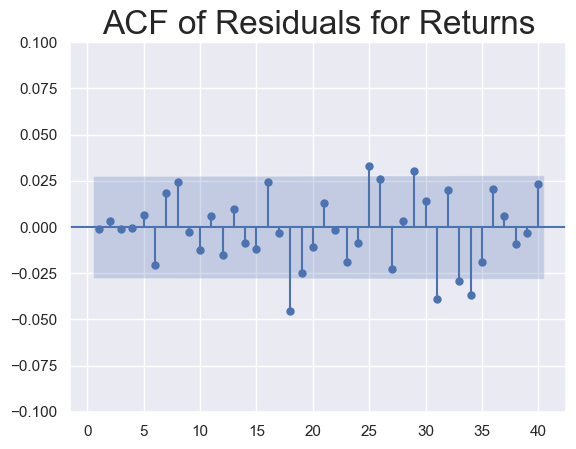

In [33]:
sgt.plot_acf(df_train.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.ylim(-0.1,0.1)
plt.show()

## ARMA Models for Prices

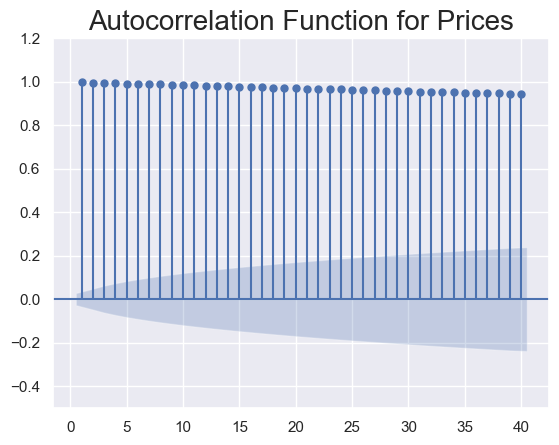

In [34]:
sgt.plot_acf(df_train.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.ylim(-0.5,1.2)
plt.show()

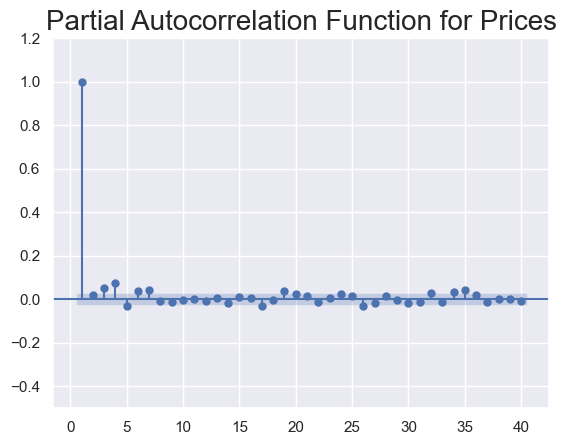

In [35]:
sgt.plot_pacf(df_train.market_value, lags = 40, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.ylim(-0.5,1.2)
plt.show()

In [36]:
model_ar_1_ma_1 = ARIMA(df_train.market_value, order=(1,0,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27621.875
Date:                Mon, 05 Aug 2024   AIC                          55251.749
Time:                        00:36:07   BIC                          55277.835
Sample:                    01-07-1994   HQIC                         55260.890
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    366.501     13.887      0.000    4371.312    5807.970
ar.L1          0.9982      0.001   1189.159      0.000       0.997       1.000
ma.L1         -0.0186      0.010     -1.894      0.058      -0.038       0.001
sigma2      3510.8350     41.068     85.489      0.000    3430.344    3591.326
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3280.53
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
df_train['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

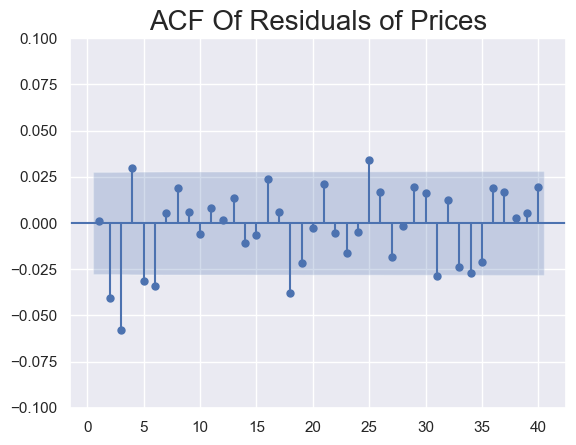

In [38]:
sgt.plot_acf(df_train.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.ylim(-0.1,0.1)
plt.show()

In [39]:
model_ar_6_ma_6 = ARIMA(df_train.market_value, order=(6,0,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -27591.277
Date:                Mon, 05 Aug 2024   AIC                          55210.553
Time:                        00:36:19   BIC                          55301.853
Sample:                    01-07-1994   HQIC                         55242.546
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6408    511.844      9.944      0.000    4086.445    6092.837
ar.L1          0.7382      0.926      0.797      0.425      -1.077       2.553
ar.L2          0.2445      1.555      0.157      0.875      -2.802       3.292
ar.L3         -0.4061      1.222     -0.332      0.740      -2.801       1.989
ar.L4          0.3422      0.758      0.451      0.652      -1.144       1.829
ar.L5         -0.1100      0.418     -0.263      0.792      -0.930       0.710
ar.L6          0.1891      0.254      0.746      0.456      -0.308       0.686
ma.L1          0.2406      0.926      0.260      0.795      -1.574       2.055
ma.L2         -0.0390      0.667     -0.058      0.953      -1.347       1.269
ma.L3          0.3344      0.562      0.595      0.552      -0.768       1.436
ma.L4          0.0823      0.243      0.339      0.735      -0.394       0.559
ma.L5          0.1450      0.300      0.482      0.629      -0.444       0.734
ma.L6         -0.0865      0.085     -1.017      0.309      -0.253       0.080
sigma2      3468.7449     43.249     80.204      0.000    3383.978    3553.511
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2960.93
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
model_ar_5_ma_6 = ARIMA(df_train.market_value, order=(5,0,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -27589.807
Date:                Mon, 05 Aug 2024   AIC                          55205.614
Time:                        00:36:32   BIC                          55290.392
Sample:                    01-07-1994   HQIC                         55235.321
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6407   1910.976      2.663      0.008    1344.197    8835.085
ar.L1          0.6122      0.590      1.037      0.300      -0.544       1.769
ar.L2         -0.2585      0.652     -0.397      0.692      -1.536       1.019
ar.L3          0.1694      0.567      0.299      0.765      -0.942       1.281
ar.L4          0.5835      0.466      1.253      0.210      -0.329       1.496
ar.L5         -0.1074      0.109     -0.986      0.324      -0.321       0.106
ma.L1          0.3648      0.589      0.619      0.536      -0.790       1.520
ma.L2          0.5905      0.134      4.392      0.000       0.327       0.854
ma.L3          0.3642      0.478      0.763      0.446      -0.572       1.300
ma.L4         -0.1528      0.096     -1.591      0.112      -0.341       0.035
ma.L5         -0.0874      0.013     -6.729      0.000      -0.113      -0.062
ma.L6         -0.0508      0.058     -0.875      0.382      -0.165       0.063
sigma2      3464.8516     42.238     82.032      0.000    3382.067    3547.637
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3024.99
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
model_ar_6_ma_1 = ARIMA(df_train.market_value, order=(6,0,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -27594.195
Date:                Mon, 05 Aug 2024   AIC                          55206.389
Time:                        00:36:40   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6310    525.600      9.683      0.000    4059.475    6119.787
ar.L1          1.3906      0.158      8.823      0.000       1.082       1.699
ar.L2         -0.4354      0.154     -2.831      0.005      -0.737      -0.134
ar.L3         -0.0102      0.017     -0.612      0.541      -0.043       0.022
ar.L4          0.1126      0.016      6.904      0.000       0.081       0.145
ar.L5         -0.1156      0.020     -5.710      0.000      -0.155      -0.076
ar.L6          0.0573      0.009      6.198      0.000       0.039       0.075
ma.L1         -0.4111      0.158     -2.601      0.009      -0.721      -0.101
sigma2      3471.7346     42.120     82.426      0.000    3389.182    3554.287
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3031.91
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,1):  \t LL = ", results_ar_6_ma_1.llf, "\t AIC = ", results_ar_6_ma_1.aic)

ARMA(5,6):  	 LL =  -27589.80702082588 	 AIC =  55205.61404165176
ARMA(6,1):  	 LL =  -27594.194621619783 	 AIC =  55206.389243239566


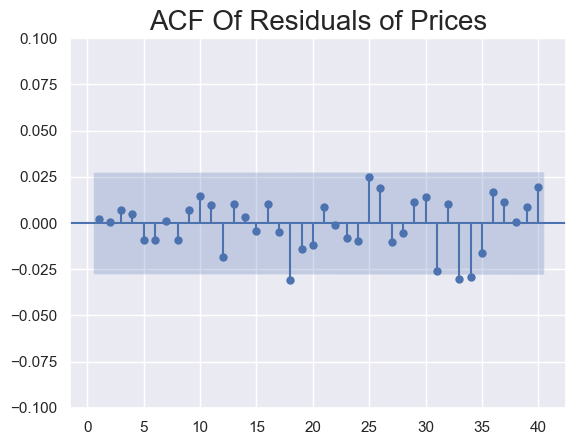

In [43]:
df_train['res_ar_5_ma_6'] = results_ar_5_ma_6.resid
sgt.plot_acf(df_train.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.ylim(-0.1,0.1)
plt.show()

## ARMA for Returns vs ARMA for Prices

In [44]:
print("ARMA(5,6):  \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(5,1):  \t LL = ", results_ret_ar_5_ma_1.llf, "\t AIC = ", results_ret_ar_5_ma_1.aic)

ARMA(5,6):  	 LL =  -27589.80702082588 	 AIC =  55205.61404165176
ARMA(5,1):  	 LL =  -7889.311305453386 	 AIC =  15794.622610906772
